**P3. Load a dataset, compute mean, median, mode, variance, and visualize distributions using plots.**

**P4. Generate a dataset, apply random, stratified, and systematic sampling, and compare their effects.**

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

1. Import the given "Mortality.csv" file as a data frame, understand, and make sure you used all the variables at least once. Handle the missing values if any.

In [3]:
data = pd.read_csv('Q8_MortalityDataset.csv')
data.info()
data.fillna(0)
print("\nRemaining missing values after cleaning:")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AGE     200 non-null    int64 
 1   HEIGHT  200 non-null    int64 
 2   WEIGHT  200 non-null    int64 
 3   CHOL    200 non-null    int64 
 4   SMOKE   200 non-null    object
 5   BLOOD   200 non-null    object
 6   MORT    200 non-null    object
dtypes: int64(4), object(3)
memory usage: 11.1+ KB

Remaining missing values after cleaning:
AGE       0
HEIGHT    0
WEIGHT    0
CHOL      0
SMOKE     0
BLOOD     0
MORT      0
dtype: int64


2. List the unique SMOKE categories.

In [4]:
smoke_categories = data['SMOKE'].unique()
print("\nUnique categories are:", smoke_categories)


Unique categories are: ['nonsmo' 'sigare' 'pipe']


3. How many had cholesterol levels above 300?

In [5]:
cholesterol_count = (data['CHOL'] > 300).sum()
print("\nNumber of people with cholesterol above 300:", cholesterol_count)


Number of people with cholesterol above 300: 12


4. What is the mean height value for those who are alive?

In [6]:
mean_height = data[data['MORT'] == 'alive']['HEIGHT'].mean()
print("\nMean height for those who are alive:", mean_height)


Mean height for those who are alive: 172.51704545454547


5. Find the age of the tallest O-Blood Group person.

In [7]:
tallest_idx = data[data['BLOOD'] == 'o']['HEIGHT'].idxmax()

tallest = data[data['BLOOD']=='o'].loc[tallest_idx, 'AGE']

print("\nAge of the tallest O-Blood Group person :", tallest)


Age of the tallest O-Blood Group person : 21


6. How many nonsmokers are alive who are below 40 years old?

In [8]:
count = len(data[(data['SMOKE'] == 'nonsmo') & (data['MORT'] == 'alive') & (data['AGE'] < 40)])
print("\nNumber of nonsmokers alive and below 40 years old:", count)


Number of nonsmokers alive and below 40 years old: 31


7. Compute the mean, median, mode, variance, standard deviation, percentile, and quartile of population.

In [9]:
all_stats = {}

numeric_cols = data.select_dtypes(include=np.number).columns

for col in numeric_cols:
    all_stats[col] = {
        'Mean': data[col].mean(),
        'Median': data[col].median(),
        'Mode': data[col].mode(),  
        'Variance': data[col].var(),
        'Standard Deviation': data[col].std(),
        '25th Percentile': data[col].quantile(0.25),
        '75th Percentile': data[col].quantile(0.75)
    }
    
for col, stats in all_stats.items():
    print(f"\nDescriptive statistics for '{col}':")
    for key, value in stats.items():
        if isinstance(value, pd.Series):
            print(f"  {key}: {value.to_string(index=False)}")
        else:
            print(f"  {key}: {value:.2f}")



Descriptive statistics for 'AGE':
  Mean: 35.72
  Median: 37.00
  Mode: 37
  Variance: 92.24
  Standard Deviation: 9.60
  25th Percentile: 28.75
  75th Percentile: 42.00

Descriptive statistics for 'HEIGHT':
  Mean: 172.35
  Median: 172.00
  Mode: 170
  Variance: 45.89
  Standard Deviation: 6.77
  25th Percentile: 168.00
  75th Percentile: 176.00

Descriptive statistics for 'WEIGHT':
  Mean: 75.89
  Median: 75.00
  Mode: 74
77
  Variance: 109.04
  Standard Deviation: 10.44
  25th Percentile: 68.75
  75th Percentile: 82.00

Descriptive statistics for 'CHOL':
  Mean: 233.60
  Median: 232.00
  Mode: 195
  Variance: 2004.06
  Standard Deviation: 44.77
  25th Percentile: 204.00
  75th Percentile: 259.00


**Interpretation of Mean, Median, and Mode:**

**AGE:** Mean (35.72), Median (37.00), and Mode (37) are very close, indicating a fairly symmetric distribution with slight left skew. Most individuals in the dataset are around 37 years old.

**HEIGHT:** Mean (172.35 cm), Median (172.00 cm), and Mode (170 cm) are nearly identical, suggesting a symmetric, approximately normal distribution. The population height is well-centered around 172 cm.

**WEIGHT:** Mean (75.89 kg), Median (75.00 kg), and Mode (74 kg and 77 kg - bimodal) are very similar. The close alignment indicates a relatively symmetric distribution, though the bimodal nature suggests there may be two distinct groups in the weight data.

**CHOL (Cholesterol):** Mean (233.60), Median (232.00), and Mode (195) show the mode is noticeably lower than mean and median. This indicates a right-skewed distribution where most people have lower cholesterol levels around 195-232, but some individuals with very high cholesterol pull the mean upward.

Overall, when mean ≈ median ≈ mode, the distribution is symmetric. When they differ significantly (as in cholesterol), it indicates skewness in the data.

8. Calculate the skewness and Kurtosis of weight and visualize distributions using plots.


Skewness of Weight: 0.52
Kurtosis of Weight: 0.42


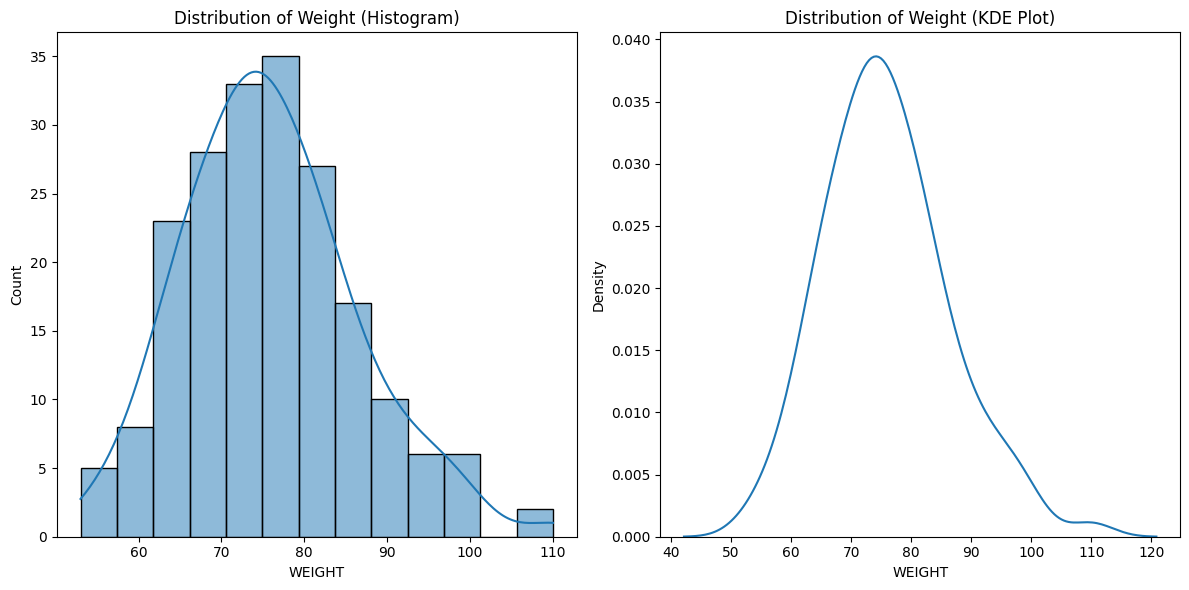

In [10]:
skewness = data['WEIGHT'].skew()
kurtosis = data['WEIGHT'].kurtosis()

print(f"\nSkewness of Weight: {skewness:.2f}")
print(f"Kurtosis of Weight: {kurtosis:.2f}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['WEIGHT'], kde=True)
plt.title('Distribution of Weight (Histogram)')

plt.subplot(1, 2, 2)
sns.kdeplot(data['WEIGHT'])
plt.title('Distribution of Weight (KDE Plot)')
plt.tight_layout()
plt.show()


**Interpretation of Kurtosis:**

The kurtosis value of 0.42 indicates that the weight distribution has slightly heavier tails and a more peaked center compared to a normal distribution (which has a kurtosis of 0). This is known as **leptokurtic** distribution.

In practical terms:
- There are slightly more extreme values (outliers) in the weight data than would be expected in a perfectly normal distribution
- The peak of the distribution is slightly more concentrated around the mean
- The positive kurtosis (0.42) combined with the positive skewness (0.52) suggests the distribution is right-skewed with some higher-weight outliers
- The relatively small kurtosis value (close to 0) indicates the distribution is fairly close to normal, with only mild deviation in tail behavior

9. Pick 25 samples in four different ways, compute the mean, median, mode, variance, and standard deviation of the picked samples.

In [11]:
from sklearn.model_selection import train_test_split

def calculate_sample_stats(sample_df, numeric_cols):
    stats = {}
    for col in numeric_cols:
        stats[col] = {
            'Mean': sample_df[col].mean(),
            'Median': sample_df[col].median(),
            'Mode': sample_df[col].mode(),
            'Variance': sample_df[col].var(),
            'Standard Deviation': sample_df[col].std()
        }
    return stats

sample_simple = data.sample(n=25, random_state=1)
stats_simple = calculate_sample_stats(sample_simple, ['AGE', 'HEIGHT', 'WEIGHT'])

def systematic_sampling(data, sample_size):
    step = len(data) // sample_size
    start = np.random.randint(0, step)
    indices = np.arange(start, len(data), step)
    return data.iloc[indices].head(sample_size)

sample_systematic = systematic_sampling(data, sample_size=25)
stats_systematic = calculate_sample_stats(sample_systematic, ['AGE', 'HEIGHT', 'WEIGHT'])

sample_stratified, _ = train_test_split(
    data, 
    train_size=25, 
    stratify=data['SMOKE'],
    random_state=1
)
stats_stratified = calculate_sample_stats(sample_stratified, ['AGE', 'HEIGHT', 'WEIGHT'])


chosen_clusters = np.random.choice(data['BLOOD'].unique(), 2, replace=False)
sample_cluster = data[data['BLOOD'].isin(chosen_clusters)].sample(n=25, replace=True, random_state=1)
stats_cluster = calculate_sample_stats(sample_cluster, ['AGE', 'HEIGHT', 'WEIGHT'])

print("Descriptive statistics for each sampling method:")
print("\n--- Simple Random Sampling (n=25) ---")
for col, stats in stats_simple.items():
    print(f"\n- Column: '{col}'")
    for key, value in stats.items():
        if key == 'Mode':
            print(f"  {key}: {value.iloc[0]:.2f}")
        else:
            print(f"  {key}: {value:.2f}")

print("\n--- Systematic Sampling (n=25) ---")
for col, stats in stats_systematic.items():
    print(f"\n- Column: '{col}'")
    for key, value in stats.items():
        if key == 'Mode':
            print(f"  {key}: {value.iloc[0]:.2f}")
        else:
            print(f"  {key}: {value:.2f}")

print("\n--- Stratified Sampling by SMOKE (n=25) ---")
for col, stats in stats_stratified.items():
    print(f"\n- Column: '{col}'")
    for key, value in stats.items():
        if key == 'Mode':
            print(f"  {key}: {value.iloc[0]:.2f}")
        else:
            print(f"  {key}: {value:.2f}")

print("\n--- Cluster Sampling by BLOOD (n=25) ---") 
print(f"  Clusters chosen: {chosen_clusters}")
for col, stats in stats_cluster.items():
    print(f"\n- Column: '{col}'")
    for key, value in stats.items():
        if key == 'Mode':
            print(f"  {key}: {value.iloc[0]:.2f}")
        else:
            print(f"  {key}: {value:.2f}")


Descriptive statistics for each sampling method:

--- Simple Random Sampling (n=25) ---

- Column: 'AGE'
  Mean: 35.92
  Median: 39.00
  Mode: 39.00
  Variance: 91.99
  Standard Deviation: 9.59

- Column: 'HEIGHT'
  Mean: 172.60
  Median: 171.00
  Mode: 168.00
  Variance: 52.50
  Standard Deviation: 7.25

- Column: 'WEIGHT'
  Mean: 72.12
  Median: 73.00
  Mode: 73.00
  Variance: 102.03
  Standard Deviation: 10.10

--- Systematic Sampling (n=25) ---

- Column: 'AGE'
  Mean: 36.44
  Median: 40.00
  Mode: 19.00
  Variance: 111.34
  Standard Deviation: 10.55

- Column: 'HEIGHT'
  Mean: 172.28
  Median: 173.00
  Mode: 172.00
  Variance: 46.04
  Standard Deviation: 6.79

- Column: 'WEIGHT'
  Mean: 76.04
  Median: 75.00
  Mode: 76.00
  Variance: 93.79
  Standard Deviation: 9.68

--- Stratified Sampling by SMOKE (n=25) ---

- Column: 'AGE'
  Mean: 34.36
  Median: 35.00
  Mode: 22.00
  Variance: 71.41
  Standard Deviation: 8.45

- Column: 'HEIGHT'
  Mean: 171.44
  Median: 170.00
  Mode: 170.00


10. Give your interpretation based on all four sampling methods.

**Interpretation of Each Sampling Method**

*Simple Random Sampling*
There is an equal chance of selecting any individual.

Interpretation: The mean Age (35.92) and Height (172.60) are close to the population means. The mean Weight (72.12) is a little lower than the population mean (75.89), and this fit is a perfect example of normal sampling variability, or the random and natural difference you would expect when looking at a sample rather than a population.

*Systematic Sampling*
Samples are selected at a regular interval (e.g. every 8th person). 

Interpretation: This method produced another representative sample. The statistics for Age (36.44) and Height (172.28) are extremely close to the population values. The mean Weight (76.04) is also very close to the population mean (75.89), and still demonstrating normal variability. This method works efficiently and often works as well as simple random sampling. 

*Stratified Sampling (by SMOKE)*
Subgroups ('strata') are created for the population and samples are taken proportionally by strata.

Interpretation: This method produced the most accurate estimate for the 'WEIGHT' variable. When one can ensure that sample reflects all of the subgroup (nonsmokers, smokers, etc.) differences, stratified sampling can limit the variability of the sample and produce very accurate results. The mean Weight of the sample (75.72) is quite close to the true population mean (75.89).

*Cluster Sampling (by BLOOD)*
This method divides the population into clusters and randomly selects entire clusters. For this sample, the clusters chosen were 'o' and 'b'.

Interpretation: We see greater deviations from the population in this sample. Mean Age (36.72), Height (174.44), and Weight (77.24) are all higher than the population means. This is a classic indication of cluster sampling. If individuals in a cluster are more like each other than they are like to the population, then this can potentially bias the sample somewhat depending on the clusters that are selected.